In [3]:
import pandas as pd
import numpy as np

In [18]:
df=pd.read_csv("apple_stock.csv")
df=df.drop("Date",axis=1)
df

,Open,High,Low,Close,Adj Close,Volume
0,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,19.243214,19.484285,19.238930,19.409286,17.015959,258529600
...,...,...,...,...,...,...
2470,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2471,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2472,166.910004,168.960007,166.830002,168.220001,167.998672,58499100
2473,169.020004,171.169998,168.869995,170.289993,170.065933,51131000


In [19]:
y=df["High"]
y

0        19.893929
1        19.775000
2        19.528570
3        19.498571
4        19.484285
           ...    
2470    173.059998
2471    171.380005
2472    168.960007
2473    171.169998
2474    170.899994
Name: High, Length: 2475, dtype: float64

In [20]:
X=df.drop("High",axis=1)
X

,Open,Low,Close,Adj Close,Volume
0,19.845715,19.715000,19.754642,17.318729,234684800
1,19.745001,19.301071,19.320715,16.938305,392467600
2,19.194643,19.057142,19.426071,17.030676,412610800
3,19.440001,19.211430,19.287144,16.908880,317209200
4,19.243214,19.238930,19.409286,17.015959,258529600
...,...,...,...,...,...
2470,171.880005,170.649994,171.100006,170.874893,57157000
2471,170.369995,165.669998,166.889999,166.670425,70625300
2472,166.910004,166.830002,168.220001,167.998672,58499100
2473,169.020004,168.869995,170.289993,170.065933,51131000


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [22]:
X_train

,Open,Low,Close,Adj Close,Volume
2459,178.100006,177.949997,178.389999,178.155289,43698000
1993,167.479996,164.529999,164.770004,162.908676,152052500
331,33.615002,32.392502,32.639999,29.332724,475696000
1976,151.889999,150.059998,151.279999,149.571030,65463900
1087,41.000000,40.157501,40.580002,38.529472,142623200
...,...,...,...,...,...
350,33.150002,32.279999,32.404999,29.243176,282790400
1930,152.830002,152.339996,152.509995,150.567383,80313700
79,20.457144,20.448214,21.217501,18.712551,669485600
1859,127.820000,125.209999,125.430000,123.647079,79295400


In [23]:
X_train

,Open,Low,Close,Adj Close,Volume
2459,178.100006,177.949997,178.389999,178.155289,43698000
1993,167.479996,164.529999,164.770004,162.908676,152052500
331,33.615002,32.392502,32.639999,29.332724,475696000
1976,151.889999,150.059998,151.279999,149.571030,65463900
1087,41.000000,40.157501,40.580002,38.529472,142623200
...,...,...,...,...,...
350,33.150002,32.279999,32.404999,29.243176,282790400
1930,152.830002,152.339996,152.509995,150.567383,80313700
79,20.457144,20.448214,21.217501,18.712551,669485600
1859,127.820000,125.209999,125.430000,123.647079,79295400


In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)
y_lr_train_pred

array([179.65957661, 168.07604814,  34.05380876, ...,  21.8339473 ,
       128.05954993,  80.00991649])

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
categorical_features=["Date"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<2475x2480 sparse matrix of type '<class 'numpy.float64'>'
	with 14850 stored elements in Compressed Sparse Row format>

In [27]:
y_lr_test_pred

array([196.03333038,  43.12670776,  31.75878013,  24.48171022,
       110.57828106,  19.10799707,  26.94000986,  25.43406261,
        25.86842512, 160.79327089,  19.73724997,  45.54702767,
        64.17330367,  80.26664098,  72.70509252,  27.50552844,
        46.68740744,  28.76338976, 135.82129135,  48.90043866,
        57.72868535, 154.20035128,  24.00531959,  33.24264483,
       180.87498123,  36.10894049,  27.11944262,  47.91931766,
        29.56529196, 136.81185037,  25.4979892 ,  48.50855347,
        28.20599407,  29.27959623,  23.17789436, 124.68658022,
        37.56735676, 127.74555979, 150.36916109,  26.28215988,
        27.55629878, 155.42198003,  55.51215161,  46.41559089,
       178.75823945,  31.89102169,  27.63125506, 147.82134631,
        78.74675721, 175.99670195,  30.19664989, 195.3573027 ,
       150.36995908,  30.60113243, 143.84552191,  46.94024008,
       155.74411691, 166.71959115,  19.63006668, 176.19689365,
       140.96551247,  52.05658551,  32.67857207,  52.06

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [29]:
lr_train_mse

0.27536039685232433

In [30]:
lr_train_r2

0.9999103790823226

In [31]:
lr_test_mse

0.34784005396883805

In [32]:
lr_test_r2

0.9998853826110495

Text(0.5, 0, 'Experimental LogS')

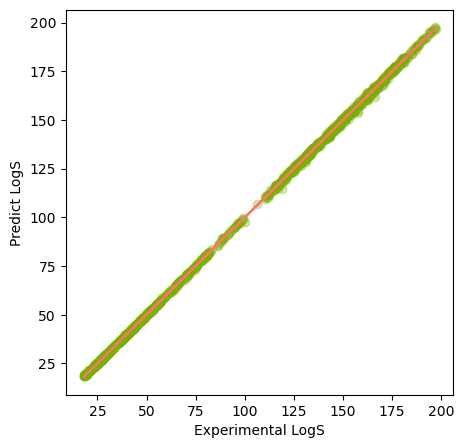

In [36]:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
     